In [ ]:

#importing the nececarry libaries to build the model (CNN)
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np


#Learning rate scedualer used for training
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    elif epoch > 100:
        lrate = 0.0003        
    return lrate


# Loading input data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Standarization 
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

# Create one hot encoding of target vector (as expected by loss function)
num_classes = 10
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)

# Construct CNN
# Each module consists of convultional, normaliazation and pooling layers
# And a final Dropout layer to improve generalization and prevent overfitting
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

# Final output layer
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.summary()

#data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train)

#training batch size to speed up training
batch_size = 64

# Optimizer used for training
# Learning rate is updated later with lr_scheduler
opt_rms = keras.optimizers.RMSprop(lr=lr_scheduler(0),decay=1e-6)

# Compile model with given optimizer and use crossentropy as loss function
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])

# Train model
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=x_train.shape[0] // batch_size,epochs=100,\
                    verbose=1,validation_data=(x_test,y_test),callbacks=[LearningRateScheduler(lr_schedule)])




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)       

In [ ]:
# Helper function for generating accuracy plot
def plotAccuracy(history):
  plt.plot(history.history['accuracy']) 
  plt.plot(history.history['val_accuracy']) 
  plt.title('model_accuracy') 
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

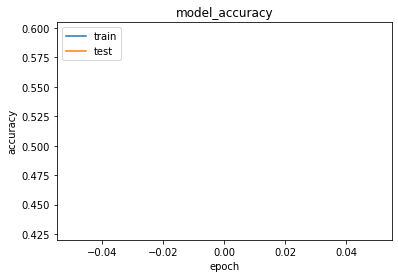

In [ ]:
plotAccuracy(history)

In [ ]:
# Helper function for plotting loss
def plotLoss(history):
  plt.plot(history.history['loss']) 
  plt.plot(history.history['val_loss']) 
  plt.title('model_loss') 
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

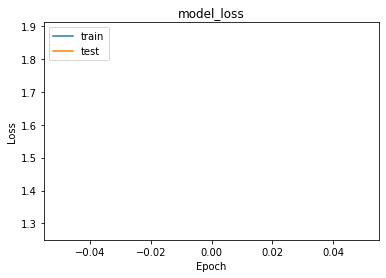

In [ ]:
plotLoss(history)

In [ ]:
# Helper function to evaulate model on unseen test data
# Evaluate by craeting confusion matrix
def eval_model(model, x_test, y_test):
  test_scores = model.evaluate(x_test, y_test, verbose=2)
  print('Test loss:', test_scores[0])
  print('Test accuracy:', test_scores[1])

  pred = model.predict(x_test); 
  indexes = tf.argmax(pred, axis =1)
  gt_idx = tf.argmax(y_test, axis=1)

  cm = confusion_matrix(gt_idx, indexes)
  fig = plt.figure(figsize=[15,15])
  ax = fig.add_subplot(2,1,1)
  c = ConfusionMatrixDisplay(cm, display_labels=range(49))
  c.plot(ax = ax)

  fig = plt.figure(figsize=[20, 5])
  ax = fig.add_subplot(1,1,1)
  ax.hist(gt_idx, bins=len(numpy.diagonal(cm)), rwidth =0.95)
  ax.plot(numpy.diagonal(cm))

In [ ]:
import numpy
import numpy.matlib
import scipy
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn import decomposition
from sklearn import discriminant_analysis
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


313/313 - 1s - loss: 0.4981 - accuracy: 0.8781
Test loss: 0.49809420108795166
Test accuracy: 0.8780999779701233


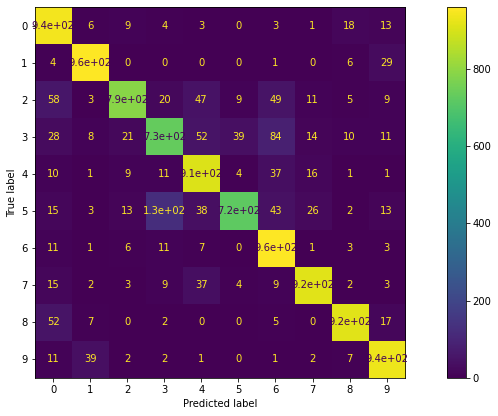

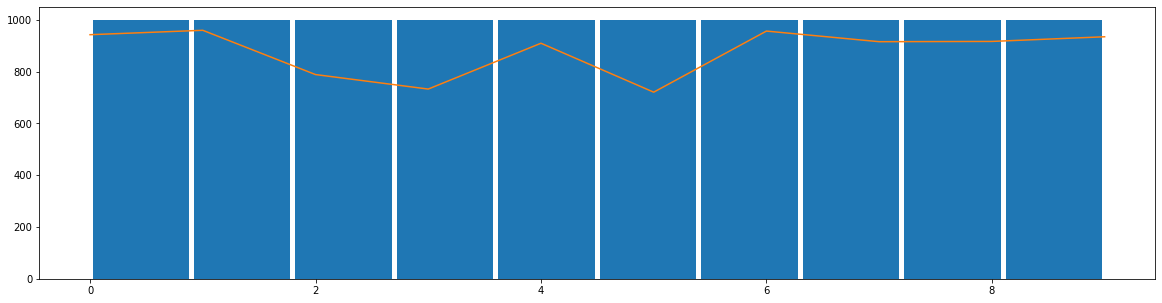

In [ ]:
eval_model(model, x_test, y_test)